In [2]:
import sys
sys.path.insert(0,r"E:\Github\scqubits")

# Initialization

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import scqubits as qubit
import numpy as np
import tqdm

**Example: Transmon qubit**

To illustrate basic functionality built into QCircuit, we consider the implementation of the transmon qubit as an example. 

# Defining circuit topology

First step is to define a circuit topology.

In [4]:
Transmon = qubit.Circuit()
Transmon.add_element(qubit.JosephsonJunction('JJ1'), ['GND', '1'])
Transmon.add_element(qubit.JosephsonJunction('JJ2'), ['1', '2'])
Transmon.add_element(qubit.Capacitance('Cq'), ['GND', '1'])

Which has the following circuit schematic 

In [5]:
import SchemDraw as schem
import SchemDraw.elements as e

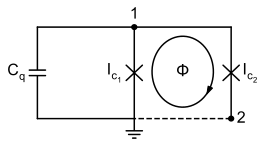

In [6]:
d = schem.Drawing()
d.add(e.CAP, d='up', l=d.unit, label='$C_q$')
d.add(e.LINE,d='right', l=d.unit)
E1=d.add(e.DOT,label='1')
E2=d.add(e.JJ, d='down', l=d.unit, label='$I_{c_1}$')
E6=d.add(e.GND,d='right')
E5=d.add(e.LINE,xy=E1.end,d='right', l=d.unit)
E3=d.add(e.JJ, d='down', l=d.unit, botlabel='$I_{c_2}$')
E4=d.add(e.DOT,botlabel='2',d='down')
d.loopI([E5,E3,E4,E2], d='cw',theta1=330, theta2=-30, label='$\Phi$',pad=0.3)
d.add(e.LINE,xy=E4.end,d='left',ls='--')
d.add(e.LINE,d='left')
d.draw()

# Parametrizing Hamiltonian

1) Specify the node variables, which can be used either to calculate wavefunctions or to set the external flux, voltage values

In [7]:
phi1 = qubit.Variable('φ1')
f = qubit.Variable('f')
ng = qubit.Variable('ng')